In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from xgboost.sklearn import XGBClassifier
from pandas.plotting import scatter_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier,BaggingClassifier,VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [61]:
dataset = pd.read_csv('G:\dataanalytics\datastorm\data-storm-10\credit_card_default_train.csv')
print(len(dataset))
print(dataset.head())

24000
  Client_ID Balance_Limit_V1 Gender EDUCATION_STATUS MARITAL_STATUS  \
0        A2               1M      M         Graduate          Other   
1        A3               1M      F      High School          Other   
2        A4             100K      F      High School         Single   
3        A5             200K      F         Graduate         Single   
4        A6               1M      F         Graduate          Other   

            AGE  PAY_JULY  PAY_AUG  PAY_SEP  PAY_OCT         ...          \
0         31-45        -1       -1       -1       -1         ...           
1  Less than 30         0       -1       -1       -1         ...           
2         31-45         4        3        2        2         ...           
3         31-45         2        0        0        0         ...           
4         31-45         2        2        0        0         ...           

   DUE_AMT_OCT  DUE_AMT_NOV  DUE_AMT_DEC  PAID_AMT_JULY  PAID_AMT_AUG  \
0        39418       162772       -13

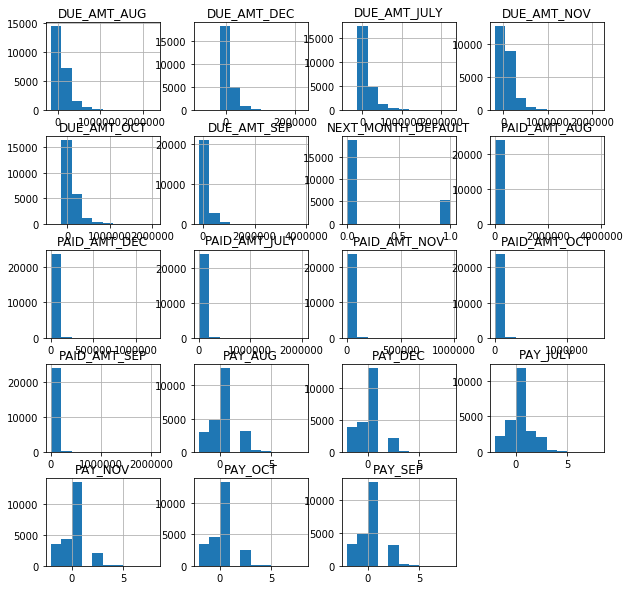

In [62]:
plt.rcParams['figure.figsize'] = (10, 10)
dataset.hist()
plt.show()

In [63]:
dataset.isna().sum()
dataset.isnull().sum()

Client_ID             0
Balance_Limit_V1      0
Gender                0
EDUCATION_STATUS      0
MARITAL_STATUS        0
AGE                   0
PAY_JULY              0
PAY_AUG               0
PAY_SEP               0
PAY_OCT               0
PAY_NOV               0
PAY_DEC               0
DUE_AMT_JULY          0
DUE_AMT_AUG           0
DUE_AMT_SEP           0
DUE_AMT_OCT           0
DUE_AMT_NOV           0
DUE_AMT_DEC           0
PAID_AMT_JULY         0
PAID_AMT_AUG          0
PAID_AMT_SEP          0
PAID_AMT_OCT          0
PAID_AMT_NOV          0
PAID_AMT_DEC          0
NEXT_MONTH_DEFAULT    0
dtype: int64

In [64]:
dataset.loc[dataset['Gender'] == "M", 'Gender'] = 1
dataset.loc[dataset['Gender'] == "F", 'Gender'] = 2
dataset.loc[dataset['EDUCATION_STATUS'] == "Graduate", 'EDUCATION_STATUS'] = 1
dataset.loc[dataset['EDUCATION_STATUS'] == "High School", 'EDUCATION_STATUS'] = 2
dataset.loc[dataset['EDUCATION_STATUS'] == "Other", 'EDUCATION_STATUS'] = 3
dataset.loc[dataset['MARITAL_STATUS'] == "Other", 'MARITAL_STATUS'] = 1
dataset.loc[dataset['MARITAL_STATUS'] == "Single", 'MARITAL_STATUS'] = 2
dataset.loc[dataset['AGE'] == "Less than 30", 'AGE'] = 1
dataset.loc[dataset['AGE'] == "31-45", 'AGE'] = 2
dataset.loc[dataset['AGE'] == "46-65", 'AGE'] = 3
dataset.loc[dataset['AGE'] == "More than 65", 'AGE'] = 4

In [65]:
dataset.insert(2,'Balance_Limit_V1_2',dataset['Balance_Limit_V1'].str.strip().str[-1])
dataset.insert(3,'Balance_Limit_V1_1',dataset['Balance_Limit_V1'].str.strip(' ').str.extract('(\d*)',expand=False))
dataset['Balance_Limit_V1_1'] = pd.to_numeric(dataset['Balance_Limit_V1_1'])
dataset.loc[dataset['Balance_Limit_V1_2'] == "M",['Balance_Limit_V1_1']]*=1000000
dataset.loc[dataset['Balance_Limit_V1_2'] == "K",['Balance_Limit_V1_1']]*=1000

In [66]:
dataset.insert(6,'pay_due_aug',dataset['PAID_AMT_AUG']- dataset['DUE_AMT_JULY'])
dataset.insert(7,'pay_due_sep',dataset['PAID_AMT_SEP']- dataset['DUE_AMT_AUG'])
dataset.insert(8,'pay_due_oct',dataset['PAID_AMT_OCT']- dataset['DUE_AMT_SEP'])
dataset.insert(9,'pay_due_nov',dataset['PAID_AMT_NOV']- dataset['DUE_AMT_OCT'])
dataset.insert(10,'pay_due_dec',dataset['PAID_AMT_DEC']- dataset['DUE_AMT_NOV'])

In [67]:
#data = dataset["PAID_AMT_JULY"].apply( lambda x: np.log1p(x) if (x>0) else 0 )
#dataset.insert(3,'Log_pjuly',data)


In [68]:
#dataset.insert(5,'Edu_Gen_m', (dataset['EDUCATION_STATUS'] + dataset['Gender']+dataset['MARITAL_STATUS']))
#dataset['Edu_Gen'] = dataset['EDUCATION_STATUS'] + dataset['Gender']

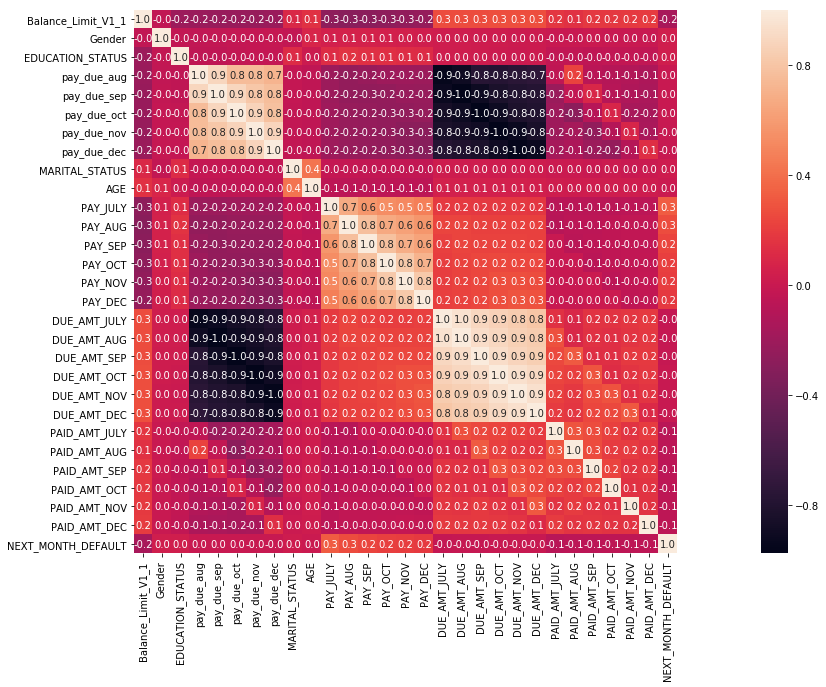

In [69]:
corr = dataset.corr()
plt.subplots(figsize=(30,10))
sns.heatmap( corr, square=True, annot=True, fmt=".1f" ) 

In [70]:
#dataset.insert(5,'Average_DUE_AMT_JtoD',(dataset.DUE_AMT_JULY+dataset.DUE_AMT_AUG+dataset.DUE_AMT_SEP+dataset.DUE_AMT_OCT+dataset.DUE_AMT_NOV+dataset.DUE_AMT_DEC)/6)

In [71]:
dataset = dataset.drop('Client_ID',axis=1)
dataset = dataset.drop('Balance_Limit_V1',axis=1)
#dataset = dataset.drop('Balance_Limit_V1_1',axis=1)
dataset = dataset.drop('Balance_Limit_V1_2',axis=1)
dataset = dataset.drop('AGE',axis=1)
#dataset = dataset.drop('Gender',axis=1)
#dataset = dataset.drop('PAY_JULY',axis=1)
#dataset = dataset.drop('PAY_AUG',axis=1)
#dataset = dataset.drop('PAY_SEP',axis=1)
#dataset = dataset.drop('PAY_OCT',axis=1)
#dataset = dataset.drop('PAY_NOV',axis=1)
#dataset = dataset.drop('PAY_DEC',axis=1)
#dataset = dataset.drop('EDUCATION_STATUS',axis=1)
dataset = dataset.drop('PAID_AMT_JULY',axis=1)
dataset = dataset.drop('DUE_AMT_JULY',axis=1)
dataset = dataset.drop('PAID_AMT_AUG',axis=1)
dataset = dataset.drop('DUE_AMT_AUG',axis=1)
dataset = dataset.drop('PAID_AMT_SEP',axis=1)
dataset = dataset.drop('DUE_AMT_SEP',axis=1)
dataset = dataset.drop('PAID_AMT_OCT',axis=1)
dataset = dataset.drop('DUE_AMT_OCT',axis=1)
dataset = dataset.drop('PAID_AMT_NOV',axis=1)
dataset = dataset.drop('DUE_AMT_NOV',axis=1)
dataset = dataset.drop('PAID_AMT_DEC',axis=1)
dataset = dataset.drop('DUE_AMT_DEC',axis=1)
#dataset = dataset.drop('Average_DUE_AMT_JtoD',axis=1)

In [72]:
print(len(dataset.columns))

16


In [73]:
x = dataset.iloc[:,0:15]
y = dataset.iloc[:,15]
x_train, x_test, y_train,y_test = train_test_split(x,y,random_state=0, test_size=0.20)

In [74]:
xgb_model = xgb.XGBClassifier(learning_rate =0.0005,
    n_estimators=500,
    max_depth = 5,
    min_child_weight = 1,
    gamma=0.01,
    subsample=0.45,
    colsample_bytree=0.9,
    reg_alpha=1,
    objective= 'binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=0)
xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_train)
print("Training Accuracy :",accuracy_score(y_train, y_pred))
y_pred = xgb_model.predict(x_test)
print("Testing Accuracy :",accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Training Accuracy : 0.82375
Testing Accuracy : 0.8222916666666666
             precision    recall  f1-score   support

          0       0.84      0.95      0.89      3739
          1       0.68      0.37      0.48      1061

avg / total       0.81      0.82      0.80      4800



C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[[3557  182]
 [ 671  390]]


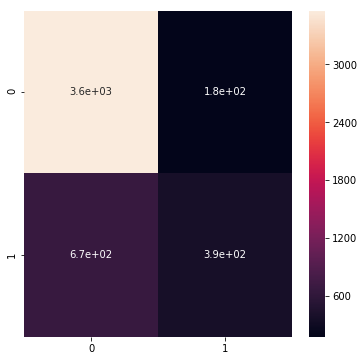

In [75]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm ,annot = True)

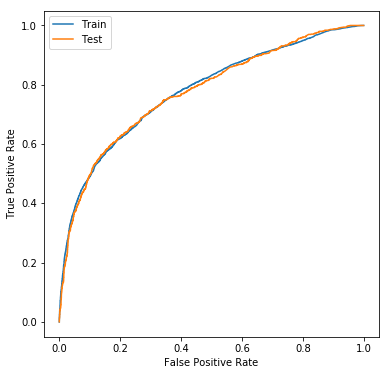

In [76]:
probas_train =xgb_model.predict_proba(x_train)
fpr_t, tpr_t, thresholds_t = roc_curve(y_train, probas_train[:, 1])
probas_ = xgb_model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)

train, = plt.plot(fpr_t, tpr_t, label = 'Train')
test, = plt.plot(fpr, tpr, label = 'Test')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [77]:
dataset1 = pd.read_csv('G:\dataanalytics\datastorm\data-storm-10\credit_card_default_test.csv')

In [78]:
dataset1.loc[dataset1['Gender'] == "M", 'Gender'] = 1
dataset1.loc[dataset1['Gender'] == "F", 'Gender'] = 2
dataset1.loc[dataset1['EDUCATION_STATUS'] == "Graduate", 'EDUCATION_STATUS'] = 1
dataset1.loc[dataset1['EDUCATION_STATUS'] == "High School", 'EDUCATION_STATUS'] = 2
dataset1.loc[dataset1['EDUCATION_STATUS'] == "Other", 'EDUCATION_STATUS'] = 3
dataset1.loc[dataset1['MARITAL_STATUS'] == "Other", 'MARITAL_STATUS'] = 1
dataset1.loc[dataset1['MARITAL_STATUS'] == "Single", 'MARITAL_STATUS'] = 2
dataset1.loc[dataset1['AGE'] == "Less than 30", 'AGE'] = 1
dataset1.loc[dataset1['AGE'] == "31-45", 'AGE'] = 2
dataset1.loc[dataset1['AGE'] == "46-65", 'AGE'] = 3
dataset1.loc[dataset1['AGE'] == "More than 65", 'AGE'] = 4

In [79]:
dataset1.insert(2,'Balance_Limit_V1_2',dataset1['Balance_Limit_V1'].str.strip().str[-1])
dataset1.insert(3,'Balance_Limit_V1_1',dataset1['Balance_Limit_V1'].str.strip(' ').str.extract('(\d*)',expand=False))
dataset1['Balance_Limit_V1_1'] = pd.to_numeric(dataset1['Balance_Limit_V1_1'])
dataset1.loc[dataset1['Balance_Limit_V1_2'] == "M",['Balance_Limit_V1_1']]*=1000000
dataset1.loc[dataset1['Balance_Limit_V1_2'] == "K",['Balance_Limit_V1_1']]*=1000

In [80]:
dataset1.insert(6,'pay_due_aug',dataset1['PAID_AMT_AUG']- dataset1['DUE_AMT_JULY'])
dataset1.insert(7,'pay_due_sep',dataset1['PAID_AMT_SEP']- dataset1['DUE_AMT_AUG'])
dataset1.insert(8,'pay_due_oct',dataset1['PAID_AMT_OCT']- dataset1['DUE_AMT_SEP'])
dataset1.insert(9,'pay_due_nov',dataset1['PAID_AMT_NOV']- dataset1['DUE_AMT_OCT'])
dataset1.insert(10,'pay_due_dec',dataset1['PAID_AMT_DEC']- dataset1['DUE_AMT_NOV'])

In [81]:
#dataset1.insert(5,'Average_DUE_AMT_JtoD',(dataset1.DUE_AMT_JULY+dataset1.DUE_AMT_AUG+dataset1.DUE_AMT_SEP+dataset1.DUE_AMT_OCT+dataset1.DUE_AMT_NOV+dataset1.DUE_AMT_DEC)/6)

In [82]:
dataset1 = dataset1.drop('Client_ID',axis=1)
dataset1 = dataset1.drop('Balance_Limit_V1',axis=1)
#dataset = dataset.drop('Balance_Limit_V1_1',axis=1)
dataset1 = dataset1.drop('Balance_Limit_V1_2',axis=1)
dataset1 = dataset1.drop('AGE',axis=1)
#dataset1 = dataset1.drop('Gender',axis=1)
dataset1 = dataset1.drop('PAID_AMT_JULY',axis=1)
dataset1 = dataset1.drop('DUE_AMT_JULY',axis=1)
dataset1 = dataset1.drop('PAID_AMT_AUG',axis=1)
dataset1 = dataset1.drop('DUE_AMT_AUG',axis=1)
dataset1 = dataset1.drop('PAID_AMT_SEP',axis=1)
dataset1 = dataset1.drop('DUE_AMT_SEP',axis=1)
dataset1 = dataset1.drop('PAID_AMT_OCT',axis=1)
dataset1 = dataset1.drop('DUE_AMT_OCT',axis=1)
dataset1 = dataset1.drop('PAID_AMT_NOV',axis=1)
dataset1 = dataset1.drop('DUE_AMT_NOV',axis=1)
dataset1 = dataset1.drop('PAID_AMT_DEC',axis=1)
dataset1 = dataset1.drop('DUE_AMT_DEC',axis=1)

In [83]:
x = dataset1.iloc[:,0:15]

In [84]:
y_pred = xgb_model.predict(x)

C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [85]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [86]:
y_pred=pd.DataFrame(y_pred)

In [87]:
#y_pred.to_csv("G:\dataanalytics\datastorm\data-storm-10\submision02.csv",index=False)